In [1]:
import tensorflow as tf
from tensorflow import keras

# MNIST Fashion Image Classification MLP

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test,y_test) = fashion_mnist.load_data()
(X_train_full_1 , y_train_full_1) , (X_test1,y_test1) =fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_valid,X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000],y_train_full[5000:]


In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


In [7]:
model.summary()
model.layers
hidden1 = model.layers[1]
hidden1.name

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


'dense'

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [9]:
test_fit = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7102 - accuracy: 0.7657 - val_loss: 0.5039 - val_accuracy: 0.8264
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4861 - accuracy: 0.8304 - val_loss: 0.4337 - val_accuracy: 0.8556
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4403 - accuracy: 0.8457 - val_loss: 0.4184 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4129 - accuracy: 0.8551 - val_loss: 0.3971 - val_accuracy: 0.8658
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3919 - accuracy: 0.8619 - val_loss: 0.3844 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8662 - val_loss: 0.3832 - val_accuracy: 0.8694
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3621 - accuracy: 0.8714 - val_loss: 0.3645 - val_accuracy:

In [10]:
y_pred = model.predict(X_test)
print(y_train)

[4 0 7 ... 3 0 5]


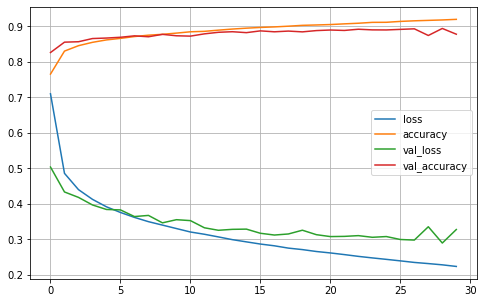

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(test_fit.history).plot(figsize=(8,5))
plt.grid()
plt.show()

In [12]:
X_new = X_test[:3]
y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# California House Regression MLP

In [13]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
dataset = fetch_california_housing()

In [15]:
X_train_full , X_test , y_train_full , y_test = train_test_split(dataset.data,dataset.target)

In [16]:
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full,y_train_full)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

In [18]:
model_housing = keras.models.Sequential([
        keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
        keras.layers.Dense(1)
])

In [19]:
model_housing.compile(loss="mean_squared_error",optimizer='sgd')
history = model_housing.fit(X_train,y_train,epochs=50,
                            validation_data=(X_valid,y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.7773 - val_loss: 1.8866
Epoch 2/50
363/363 [==============================] - 0s 1ms/step - loss: 0.5100 - val_loss: 0.5961
Epoch 3/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4304 - val_loss: 0.3875
Epoch 4/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4064 - val_loss: 0.4629
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.4752 - val_loss: 0.3928
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3887 - val_loss: 0.3755
Epoch 7/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3834 - val_loss: 0.3780
Epoch 8/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3829 - val_loss: 0.4091
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3802 - val_loss: 0.3647
Epoch 10/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3701 - val_loss: 0.3672

# Building Complex Models Using the Functional API (Wide & Deep) pg.308

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input_)
hidden2 = keras.layers.Dense(30,activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output= keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])